In [1]:

from simulation.parameters_calculator import ParameterCalculator
from networks.er_network import ErNetwork
import matplotlib.pyplot as plt
from simulation.ponzi_simulation import PonziSimulation

In [3]:
erNet = ErNetwork(k_avg=5, n_nodes=10000, capital_per_person=100, ponzi_capital=5000)

erNet.build()
erNet.save_json('my_networks/er1.json')

Building ER network...
Network salvato in my_networks/er1.json


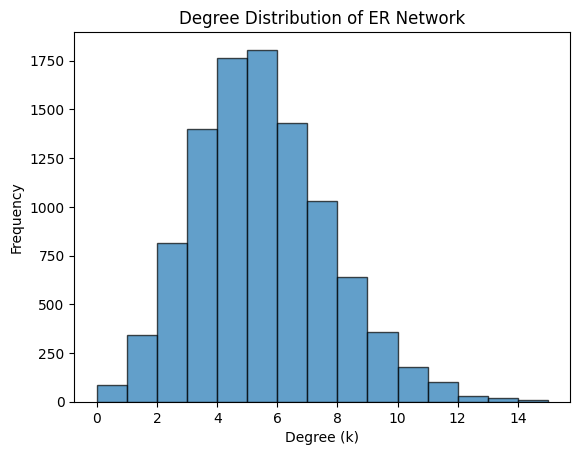

In [4]:
k_values = erNet.k_distribution()
plt.hist(k_values, bins=range(min(k_values), max(k_values) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Degree (k)')
plt.ylabel('Frequency')
plt.title('Degree Distribution of ER Network')
plt.show()

Starting simulation with lambda=<function <lambda> at 0x000001C6B2F68360>, mu=<function <lambda> at 0x000001C6B2F68400>
5.00% complete
10.00% complete
15.28% complete
20.28% complete
25.28% complete
30.28% complete
35.28% complete
40.28% complete
45.28% complete
50.28% complete
55.28% complete
60.56% complete
65.56% complete
70.56% complete
75.83% complete
80.83% complete
86.11% complete


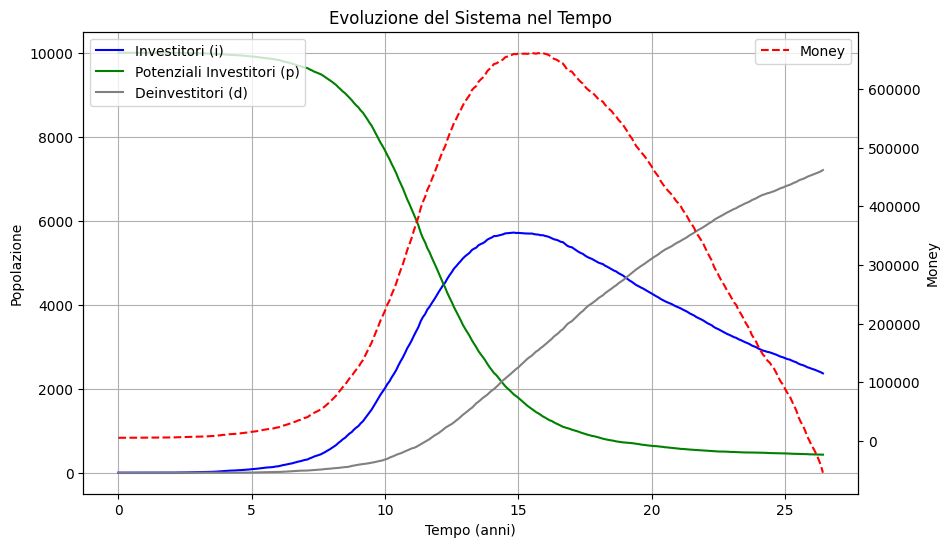

In [7]:
interest_calculator = ParameterCalculator(rp= lambda t: 0.1, rr= lambda t: 0.05)

ponzi = PonziSimulation(
    network = erNet,
    interest_calculator = interest_calculator,
    max_time_units = 30 * 12,
    dt = 1. / 12,
    lambda_ = lambda t: 0.2,
    mu = lambda t: 0.1,
    capital_per_person = 100,
    ponzi_capital = 5000)

ponzi_capital, investor, potential, deinvestor, degrees_money = ponzi.simulate_ponzi()

ponzi.graph('test')

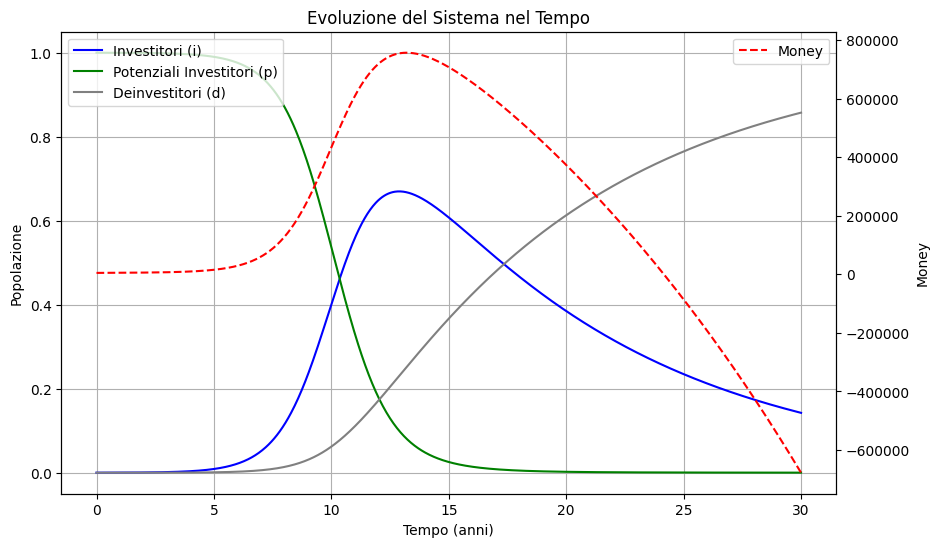

In [10]:
from simulation.differential_equations import DifferentialEquations

diff = DifferentialEquations(
    rp = interest_calculator.rp,
    rr = interest_calculator.rr,
    lambda_ = lambda t: 0.2,
    mu = lambda t: 0.1,
    M = 100,
    ponzi_capital = 5000,
    N=10000, avg_k=5)

diff.solve(0, 30, 1000)

diff.graph('asd')


In [4]:
erNet = ErNetwork(k_avg=10, n_nodes=10000, capital_per_person=100, ponzi_capital=5000)

erNet.build()
erNet.save_json('my_networks/er2.json')

Building ER network...
Network salvato in my_networks/er2.json


[*********************100%***********************]  1 of 1 completed

Network caricato da my_networks/er2.json



C:\Users\Torto\PycharmProjects\Ponzi-Scheme\networks\interest_calculator.py:59: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  positivity= quad(integrand, t_start, t_end)[0]


Starting simulation with lambda=<function <lambda> at 0x0000023132062CA0>, mu=<function InterestCalculator.mu_from_rr_func.<locals>.<lambda> at 0x000002316E9AB560>
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before evolution, investors are  1
after evolution, investors are  1
before e

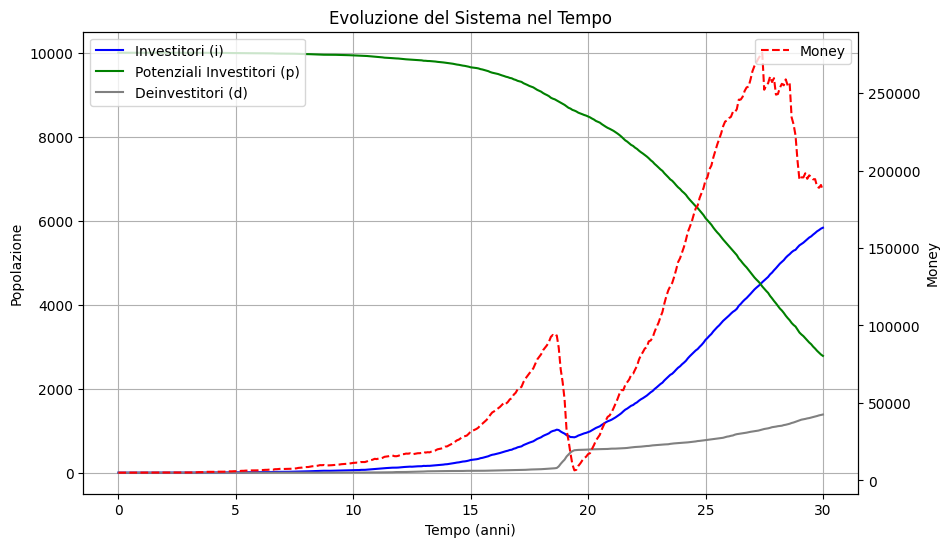

In [8]:
from simulation.finance_data import FinanceData
from simulation.parameters_calculator import ParameterCalculator
from networks.er_network import ErNetwork
from simulation.ponzi_simulation import PonziSimulation

erNet = ErNetwork.load_json('my_networks/er2.json')
data = FinanceData()
data.download()

interest_calculator = ParameterCalculator(rp= lambda t: 0.25, rr= data.market_rr) #data.interpolated_r_r)
interest_calculator.compute_market_positivity(0, 30, 200)

ponzi = PonziSimulation(
    network = erNet,
    interest_calculator = interest_calculator,
    max_time_units = 30 * 12,
    dt = 1. / 12,
    lambda_ = lambda t: 0.04,
    mu = interest_calculator.mu_from_rr_func(base=0.03, min=0.025, max=0.8, steepness=150),# interest_calculator.mu_from_rr_func(base=0.03, min=0.025, max=0.8, steepness=150),
    capital_per_person = 100,
    ponzi_capital = 5000)

ponzi_capital, investor, potential, deinvestor, degrees_money = ponzi.simulate_ponzi()
print('ending money', ponzi_capital[-1])
print('ending investors', investor[-1])
ponzi.graph('test')

In [18]:
erNet.print_k_info()

'Mean: 10.0572, k^2: 111.0662'